# Predicting Student Admissions with Neural Networks in Keras
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

# 1. Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Setting the random seed
import random
random.seed(42)

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


# 2. Plotting the data
First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

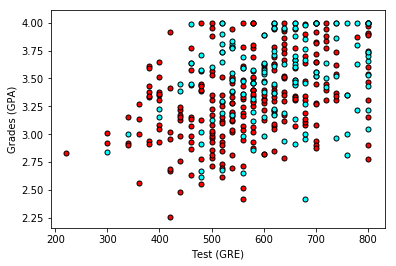

In [2]:
# Removing the rank column
data_two_columns = data[['admit', 'gre', 'gpa']]

# Importing matplotlib
import matplotlib.pyplot as plt
import numpy as np
from utils import plot_points

# Plotting the points
plot_points(data_two_columns)
plt.show()

# 3. Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [3]:
# Scaling the columns
data_scaled = data.copy()
data_scaled['gre'] = data['gre']/800
data_scaled['gpa'] = data['gpa']/4.0
data_scaled = data_scaled.drop('rank', axis=1)
data_scaled[:10]

,admit,gre,gpa
0,0,0.475,0.9025
1,1,0.825,0.9175
2,1,1.000,1.0000
3,1,0.800,0.7975
4,0,0.650,0.7325
5,1,0.950,0.7500
6,1,0.700,0.7450
7,0,0.500,0.7700
8,1,0.675,0.8475
9,0,0.875,0.9800


# 4. Training the simple model
We'll start by training a simple logistic regression model on this data.

/Users/luis/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


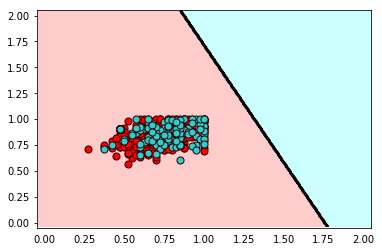

273 correct out of 400
Accuracy: 0.6825


In [4]:
features = np.array(data_scaled[['gre', 'gpa']])
targets = np.array(data_scaled[['admit']])

from utils import train_linear_model
predictions_simple = train_linear_model(features, targets)

# 5. Exploring the data more
Ok, the last model didn't do so well, so let's remember that we have a rank column, and use it.

In [5]:
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


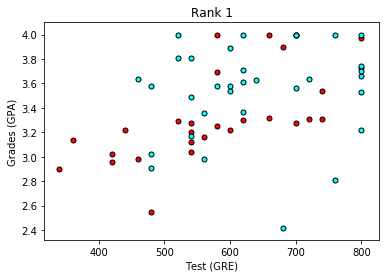

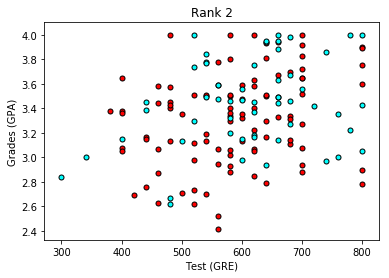

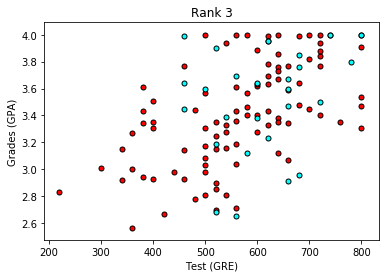

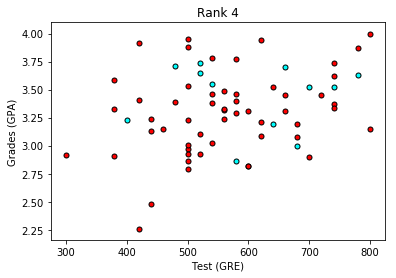

In [6]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

# 6. Training the Normal Model

In [7]:
# Scaling the columns again and training linear model
data_scaled = data[:]
data_scaled['gre'] = data_scaled['gre']/800
data_scaled['gpa'] = data_scaled['gpa']/4.0
data_scaled[:10]

features = np.array(data_scaled[['gre', 'gpa', 'rank']])
targets = np.array(data_scaled[['admit']])

predictions_normal = train_linear_model(features, targets, False)

/Users/luis/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


284 correct out of 400
Accuracy: 0.71


# 7. One-hot encoding
Let's start by one-hot encoding the rank, in order to remove dependencies between successive ranks.

In [8]:
from keras.utils import to_categorical

# Make dummy variables for rank
one_hot_data = pd.concat([data_scaled, pd.get_dummies(data_scaled['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

features_one_hot = np.array(one_hot_data.drop('admit', axis=1))
targets_one_hot = np.array(to_categorical(one_hot_data['admit'], 2))

# Print the first 10 rows of our data
one_hot_data[:10]

Using TensorFlow backend.


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


# 8. Training the Advanced Model (Neural Network)
Ok, let's use the power of Keras to train a large neural network, and see how it does.

In [24]:
from utils import train_neural_network
predictions_advanced = train_neural_network(features_one_hot, targets_one_hot)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              7168      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 258       
Total para

# 9. Confusion Matrices

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(targets, predictions_simple)

array([[273,   0],
       [127,   0]])

In [11]:
confusion_matrix(targets, predictions_normal)

array([[258,  15],
       [101,  26]])

In [12]:
confusion_matrix(targets, predictions_advanced)

array([[250,  23],
       [ 93,  34]])

# 10. Calculating Precision, Recall, F1 Score

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
# The simple model

print('Accuracy:', accuracy_score(predictions_simple, targets))
print('Precision:', precision_score(predictions_simple, targets))
print('Recall:', recall_score(predictions_simple, targets))
print('F1 Score:', f1_score(predictions_simple, targets))

Accuracy: 0.6825
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/luis/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/luis/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [15]:
# The normal model

print('Accuracy:', accuracy_score(predictions_normal, targets))
print('Precision:', precision_score(predictions_normal, targets))
print('Recall:', recall_score(predictions_normal, targets))
print('F1 Score:', f1_score(predictions_normal, targets))

Accuracy: 0.71
Precision: 0.204724409449
Recall: 0.634146341463
F1 Score: 0.309523809524


In [16]:
# The advanced model

print('Accuracy:', accuracy_score(predictions_advanced, targets))
print('Precision:', precision_score(predictions_advanced, targets))
print('Recall:', recall_score(predictions_advanced, targets))
print('F1 Score:', f1_score(predictions_advanced, targets))

Accuracy: 0.71
Precision: 0.267716535433
Recall: 0.59649122807
F1 Score: 0.369565217391


# 11. Testing the model

### Splitting the dataset into training and testing

In [17]:
sample = np.random.choice(one_hot_data.index, size=int(len(one_hot_data)*0.9), replace=False)
train_data, test_data = one_hot_data.iloc[sample], one_hot_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre    gpa  rank_1  rank_2  rank_3  rank_4
88       0  0.875  0.820       1       0       0       0
244      0  0.675  0.760       1       0       0       0
132      0  0.725  0.850       0       1       0       0
40       0  0.700  0.605       0       1       0       0
229      1  0.900  0.855       0       1       0       0
11       0  0.550  0.805       1       0       0       0
57       0  0.475  0.735       0       0       1       0
374      0  0.700  0.945       0       1       0       0
292      0  0.850  0.925       0       1       0       0
150      1  1.000  0.935       1       0       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
5       1  0.950  0.7500       0       1       0       0
21      1  0.825  0.9075       0       1       0       0
32      0  0.750  0.8500       0       0       1       0
36      0  0.725  0.8125       1       0       0       0
41      1  0.725  0.83

### Testing the ok model

In [22]:
features_train = np.array(train_data.drop('admit', axis=1))
targets_train = np.array(train_data['admit'])
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(test_data['admit'])

from utils import test_linear_model
test_linear_model(features_train, targets_train, features_test, targets_test)

Accuracy: 0.625


### Testing the Advanced Model

In [23]:
import keras

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
features_train = np.array(train_data.drop('admit', axis=1))
targets_train = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

from utils import test_neural_network
test_neural_network(features_train, targets_train, features_test, targets_test)

32/40 [=======================>......] - ETA: 0s
 Testing Accuracy: 0.625
